Grafica PoS individual


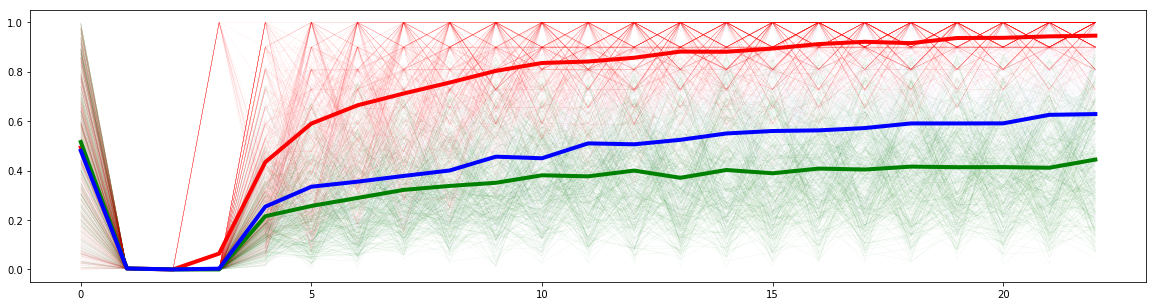

Grafica PoS media


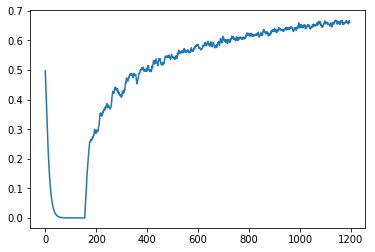

Grafica PoS media por grupos


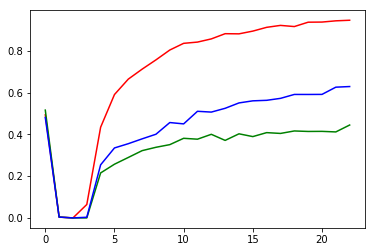

cantidad de pares de comunicacion


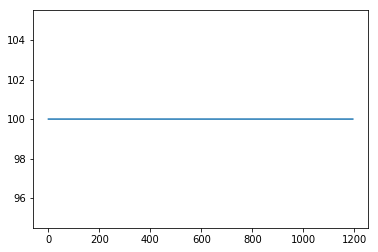

Porcentaje grupos con distinta media de crimen
[0.314 0.359 0.327]
Vector media de crimen por grupos
[0.1 0.  1. ]
velocidad de olvido
0.9
impacto de la inseguridad nu
0.9
Resistencia a la inseguridad mu
0.1
HOmofilia
0.41903010033444815


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

n = 1000  # numero de personas
annos=23 ##23
T = annos*52  # numero de periodos años x 52 semanas
s = np.random.rand(n)  # vector PoS de las personas en el intante t, al principio aleatorio
g=np.zeros(n)#vector identificacion de grupo
psi = 0.9  # velocidad perdida de memoria
nu = 0.9  # Impacto de la inseguridad
mu = 0.1  # Resistencia a la inseguridad
St = np.zeros((T,n ))  # PoS a lo largo del tiempo
m = 3  # cantidad de grupos con distinta tasa de crimen por periodo
kappa=np.concatenate((np.array([0,0]),np.linspace(0,2,int(T/52)-2)))#comienza en 0 y aumenta hasta 2
lamda = kappa[0]*np.array([0.05,0,0.5])  # tasas de crimen de los grupos
q = np.array([0.314, 0.359, 0.327])  # porcentajes de los grupos en la poblacion total

#identificacion de cada sujeto con su respectiva media de crimen 
for i in range(int(n*q[0])):
    g[i]=lamda[0]
for i in range(int(n*q[0]),int(n*(q[0]+q[1]))):
    g[i]=lamda[1]
for i in range(int(n*(q[0]+q[1])),n):
    g[i]=lamda[2]

# calculo de la Pos en el intante t
# en t=0 es s
St[0] = s
parescom=np.zeros(T)#cantidad pares de comunicacion en cada periodo
homofilia=np.zeros(T)
for t in range(1,T):
    #cambio de parametros lamba en el tiempo
    if t%52==0: #al pasar un año cambia k
        lamda = kappa[int(t/52)]*np.array([0.05,0,0.5])
        #identificacion de cada sujeto con su respectiva media de crimen 
        for i in range(int(n*q[0])):
            g[i]=lamda[0]
        for i in range(int(n*q[0]),int(n*(q[0]+q[1]))):
            g[i]=lamda[1]
        for i in range(int(n*(q[0]+q[1])),n):
            g[i]=lamda[2]
    # Al inicio de cada periodo aplicamos la perdida de memoria
    s = psi * s
    
    #pares de comunicacion 
    #vector de personas aleatoriamente ordenado 
    apersonas=np.random.permutation(np.arange(n))
    #escogemos 20%, 10% de cada extremo
    pares1=apersonas[:int(n*0.1)]
    pares2=apersonas[-int(n*0.1):]
    
    for k in range(len(pares1)):
        aux1=pares1[k]
        aux2=pares2[k]
        
        if s[aux1]<s[aux2]:
            s[aux1] = s[aux1] - nu * (s[aux1] - s[aux2])
            s[aux2] = s[aux2] - mu * (s[aux2] - s[aux1])
        else:
            s[aux1] = s[aux1] - mu * (s[aux1] - s[aux2])
            s[aux2] = s[aux2] - nu * (s[aux2] - s[aux1])
        #medicion de la homofilia
        if g[aux1]==g[aux2]:
            homofilia[t]=homofilia[t]+1
    
    
    parescom[t]=len(pares1)
    homofilia[t]=homofilia[t]/parescom[t]    
    for k in range(n):
        # numero de crimenes sufridos por la persona k 
        X = np.random.poisson(g[k])
        # posicion hubo crimen o no
        I = 0
        if X >= 1:  # si hubo al menos un crimen I=1 de lo contrario I=0
            I = 1
        # efecto del crimen en la percepcion de k para el siguiente periodo
        s[k] = I + (1 - I) * s[k]     
    St[t] = s
    
%matplotlib inline 
plt.figure(figsize=(20,5))
print("Grafica PoS individual")
plt.plot(St[::52,range(int(n*q[0]),int(n*q[0]+n*q[1]))],'green',linewidth=0.3,alpha=0.1)
plt.plot(St[::52,range(int(n*q[0]))],'blue',linewidth=0.3,alpha=0.01)
plt.plot(St[::52,range(int(n*q[0]+n*q[1]),n)],'red',linewidth=0.3,alpha=0.1)
plt.plot(np.mean(St[::52,range(int(n*q[0]+n*q[1]),n)],axis=1),'red',linewidth=4)
plt.plot(np.mean(St[::52,range(int(n*q[0]),int(n*q[0]+n*q[1]))],axis=1),'green',linewidth=4)
plt.plot(np.mean(St[::52,range(int(n*q[0]))],axis=1),'blue',linewidth=4)
plt.show()



print("Grafica PoS media")
plt.plot(np.mean(St,axis=1))
plt.show()
print("Grafica PoS media por grupos")
plt.plot(np.mean(St[::52,range(int(n*q[0]+n*q[1]),n)],axis=1),'red')
plt.plot(np.mean(St[::52,range(int(n*q[0]),int(n*q[0]+n*q[1]))],axis=1),'green')
plt.plot(np.mean(St[::52,range(int(n*q[0]))],axis=1),'blue')
plt.show()


print("cantidad de pares de comunicacion")
plt.plot(parescom[1:])
plt.show()
print("Porcentaje grupos con distinta media de crimen")
print(q)
print("Vector media de crimen por grupos")
print(lamda)
print("velocidad de olvido")
print(psi)
print("impacto de la inseguridad nu")
print(nu)
print("Resistencia a la inseguridad mu")
print(mu)
print("HOmofilia")
print(np.mean(homofilia))


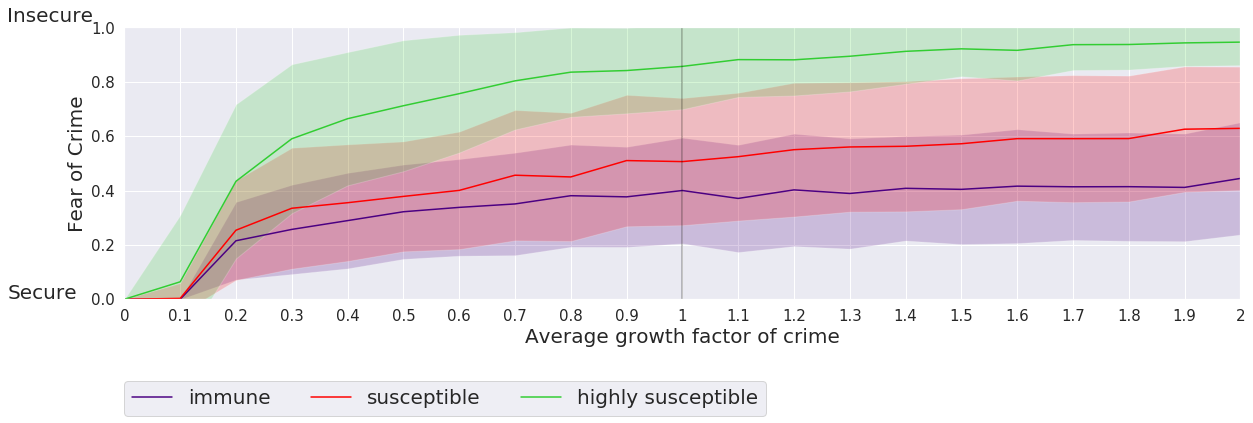

In [3]:
import seaborn as sns
sns.set(color_codes=True)
plt.figure(figsize=(20,5))
sns.tsplot(data=St[104::52,range(int(n*q[0]),int(n*q[0]+n*q[1]))].T,ci='sd',color='indigo')
sns.tsplot(data=St[104::52,range(int(n*q[0]))].T,ci='sd',color='red')
sns.tsplot(data=St[104::52,range(int(n*q[0]+n*q[1]),n)].T,ci='sd',color='limegreen')

G=[]
G.append(St[104::52,range(int(n*q[0]),int(n*q[0]+n*q[1]))].T)
G.append(St[104::52,range(int(n*q[0]))].T)
G.append(St[104::52,range(int(n*q[0]+n*q[1]),n)].T)
#plt.legend(["group 1","group 2", "group 3"],fontsize=20)
plt.axvline(10, color = 'black',alpha=0.3)
plt.xlabel("Average growth factor of crime",fontsize=20)
plt.ylabel("Fear of Crime",fontsize=20)
ax = plt.axes()
plt.ylim(0,1)
ax.xaxis.set_ticks([0, 1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
ax.xaxis.set_ticklabels(['0', '0.1', '0.2', '0.3', '0.4','0.5','0.6','0.7','0.8','0.9','1','1.1','1.2','1.3','1.4','1.5','1.6','1.7','1.8','1.9','2'])
ax.tick_params(labelsize=15)
h = plt.gca().get_lines()
plt.legend(handles=h,labels=["immune","susceptible","highly susceptible" ],ncol=3,fontsize=20,bbox_to_anchor=(0, -0.3), loc=2, borderaxespad=0)
plt.text(-2.1, 1.02,'Insecure', fontsize=20)
plt.text(-2.1, 0,'Secure', fontsize=20)
plt.savefig('exp2singrafo.pdf',bbox_inches="tight")

          0         1         2
0  0.000000 -0.423680 -1.092833
1  0.423680  0.000000 -0.657406
2  1.092833  0.657406  0.000000


[Text(0,0.5,'0'), Text(0,1.5,'1'), Text(0,2.5,'2')]

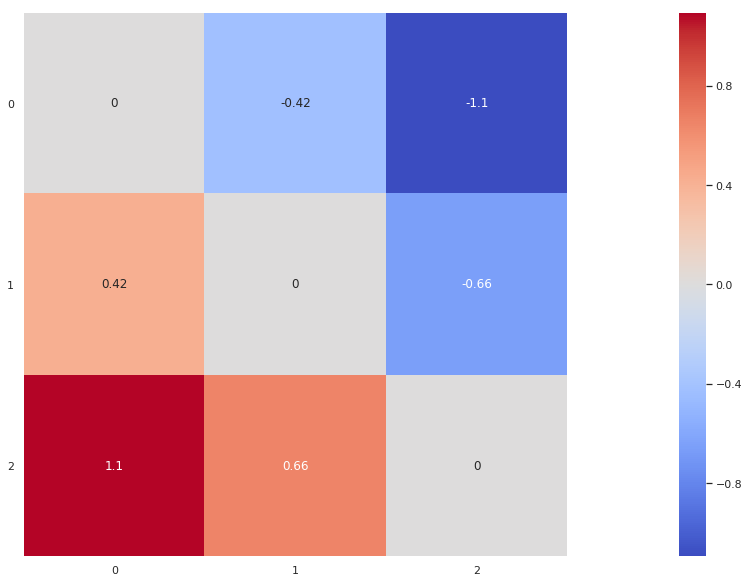

In [3]:
tiempo=G[0].shape[1]
g=[]
for k in range(m):
    mean=np.zeros(tiempo)
    std=np.zeros(tiempo)
    for i in range(tiempo):
        mean[i]=np.mean(G[k][i][:])
        std[i]=np.std(G[k][i][:])
    g.append((G[k],mean,std))

D=np.zeros((m,m))
for k in range(m):
    for n in range(m):
        d=np.zeros(tiempo)
        for i in range(tiempo):
            N1=g[k][0].shape[0]
            N2=g[n][0].shape[0]
            s2=((N1-1)*g[k][2][i]**2+(N2-1)*g[n][2][i]**2)/(N1+N2-2)
            d[i]=(g[k][1][i]-g[n][1][i])/np.sqrt(s2)
        D[k][n]=d[2]
from pandas import DataFrame
D = DataFrame(D)
print(D)
plt.figure(figsize=(40,10))
ax = sns.heatmap(D,annot=True,cmap="coolwarm",square=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

In [4]:
for i in range(m):
    print(np.mean(g[i][1]))

0.33832178218031383
0.4458416532114943
0.734032039777778
